In [500]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

## 1. Implementacja funckji knn()

Funkcja knn

In [419]:
def knn(X_train, y, X_test, k, p=2):
    w = []
    for i in range(X_test.shape[0]):
        distances = []
        for j in range(len(y)):
            dj = np.linalg.norm(X_test[i,] - X_train[j,], ord=p)
            distances.append([dj,j])

        distances.sort(key=lambda x: x[0])
        indices = [x[1] for x in distances][:k]
        y = np.array(y)
        labels = list(y[indices])
        # wybieranie elementu mody
        checking = [0] * (X_test.shape[1] + 1)
        for el in labels:
            checking[el]+=1
        checking = sorted(checking, reverse=True)

        # jeśli pojawienie najczęstszego indeksu było większe od pozostałych to bierzemy największy indeks
        mode_results = []
        if checking[0] > checking[1]: mode_result = max(set(labels), key=labels.count)
        else: 
            for el in set(labels):
                if labels.count(el) == checking[0]:
                    mode_results.append(el)
            mode_result = np.random.choice(mode_results)

        w.append(mode_result)

    return w

Dane:

## Test 0

In [658]:
# macierz X wymiaru n x p - zbiór treningowy
n = 40
p = 6
X = np.array([[np.random.rand() for _ in range(p)] for _ in range(n)])

# etykieta y 
y = np.random.randint(0,2,n)

# Z - macierz m x p - zbiór testowy
m = 10
Z = np.array([[np.random.rand() for _ in range(p)] for _ in range(m)])

# k - liczba sąsiadów
k = np.random.randint(1,n)

# p - metryka
inf = np.inf
p = 1 # 1,2,inf
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=320575)

In [655]:
w = knn(X,y,Z,k,p=2)
w

[1, 1, 0, 0, 0, 1, 1, 0, 0, 0]

In [498]:
# Jest Ok działa

In [659]:
inf = np.inf

for par in (1,2,inf):
    print(f"_______ Metryka {str(par)} _______\n")
    for i in range(5, 40, 10):
        w = knn(X_train,y_train,X_test,i,par)
        print(f"Dla parametru k = {i}, otrzymaliśmy następujące wyniki:\n")
        print(f"- Dokładność: {accuracy_score(y_test,w):0.4f}\n")
        print(f"- Precyzja: {precision_score(y_test,w):0.4f}\n")
        print(f"- Czułość: {recall_score(y_test,w):0.4f}\n")

_______ Metryka 1 _______

Dla parametru k = 5, otrzymaliśmy następujące wyniki:

- Dokładność: 0.7500

- Precyzja: 1.0000

- Czułość: 0.5000

Dla parametru k = 15, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5833

- Precyzja: 1.0000

- Czułość: 0.1667

Dla parametru k = 25, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5000

- Precyzja: 0.0000

- Czułość: 0.0000

Dla parametru k = 35, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5000

- Precyzja: 0.0000

- Czułość: 0.0000

_______ Metryka 2 _______

Dla parametru k = 5, otrzymaliśmy następujące wyniki:

- Dokładność: 0.8333

- Precyzja: 1.0000

- Czułość: 0.6667

Dla parametru k = 15, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5000

- Precyzja: 0.0000

- Czułość: 0.0000

Dla parametru k = 25, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5000

- Precyzja: 0.0000

- Czułość: 0.0000

Dla parametru k = 35, otrzymaliśmy następujące wyniki:

- Dokładność: 0.5000

- Precyzja: 0.0000

- Czułość: 0.0000

_______ Metr

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

## 1-NN dla danych X_test i X_train tozszamych

In [499]:
n = 30 
p = 2
X = np.array([[np.random.rand() for _ in range(p)] for _ in range(n)])

# etykieta y 
y = np.random.randint(0,p,n)
w = knn(X, y, X, k=1, p=2)

accuracy_score(w,y)

1.0

In [501]:
# Jest Ok

## Test 1, Dane losowe w R^2

Text(0, 0.5, 'Wymiar 2')

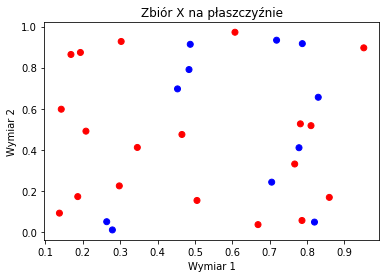

In [607]:
# macierz X wymiaru n x p - zbiór treningowy
n = 30 
p = 2
X = np.array([[np.random.rand() for _ in range(p)] for _ in range(n)])

# etykieta y 
y = np.random.randint(0,p,n)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# k - liczba sąsiadów

colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], color = colors, marker='o', label='Zbiór X', cmap='viridis')

plt.title('Zbiór X na płaszczyźnie')
plt.xlabel('Wymiar 1')
plt.ylabel('Wymiar 2')


Sprawdzmy jak zklasyfikowany zostanie punkt [0, 0.8]

In [608]:
check = np.array([[0, 0.8]])
w = knn(X_train, y_train, check, k=5, p=2)
w

[0]

In [552]:
# Jest z klasy 1 a więc niebieskiej

<function matplotlib.pyplot.show(close=None, block=None)>

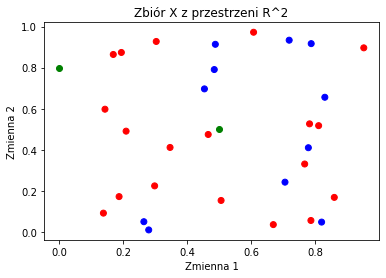

In [609]:
plt.scatter(X[:, 0], X[:, 1], color = colors, marker='o', label='Zbiór X', cmap='viridis')
plt.scatter(0, 0.8, color='green', marker='o', label='Nowy punkt [0, 0.8]')
plt.scatter(0.5, 0.5, color='green', marker='o', label='Nowy punkt [0.5, 0.5]')
plt.title('Zbiór X z przestrzeni R^2')
plt.xlabel('Zmienna 1')
plt.ylabel('Zmienna 2')
plt.show

In [616]:
check = np.array([[0.5, 0.5]])
w = knn(X_train, y_train, check, k=5, p=2)
w

[1]

In [615]:
w = knn(X_train, y_train, X_test, k=5, p=2)
print(accuracy_score(w,y_test))

0.6666666666666666


## Test 2

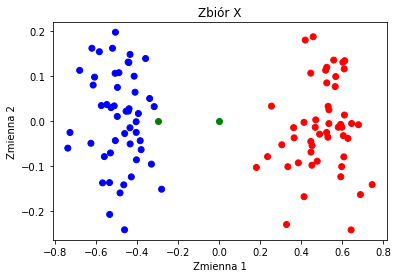

In [591]:
n = 100  
p = 2    

polowa = n // 2
X = np.zeros((n, p))

X[:polowa, 0] = np.random.normal(loc=-0.5, scale=0.1, size=polowa)
X[:polowa, 1] = np.random.normal(loc=0, scale=0.1, size=polowa)

X[polowa:, 0] = np.random.normal(loc=0.5, scale=0.1, size=polowa)
X[polowa:, 1] = np.random.normal(loc=0, scale=0.1, size=polowa)

y = np.zeros(n)
y[:50] = 1
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], color = colors, marker='o', label='Zbiór X', cmap='viridis')

plt.scatter(-0.3, 0, color='green', marker='o', label='Nowy punkt [-0.2, 0]')
plt.scatter(0, 0, color='green', marker='o', label='Nowy punkt [0, 0]')

plt.title('Zbiór X')
plt.xlabel('Zmienna 1')
plt.ylabel('Zmienna 2')

plt.show()

In [597]:
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=320575)

In [600]:
w = knn(X_train, y_train, X_test, k=5, p=2)
print(accuracy_score(w,y_test))
print(precision_score(w,y_test))
print(recall_score(w,y_test))

1.0
1.0
1.0


In [601]:
check = np.array([[-0.3, 0]])
w = knn(X_train, y_train, check, k=5, p=2)
w

[1]

In [602]:
check = np.array([[0, 0]])
w = knn(X_train, y_train, check, k=5, p=2)
w

[0]

In [ ]:
check = np.array([[-0.3, 0]])
w = knn(X_train, y_train, check, k=5, p=2)
w

## Testy k i p

## Test 2 - dane rzeczywiste w R^2

In [487]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("SAheart.data")
y = df.chd
X = df.drop(['chd'], axis = 1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [488]:
scaler = StandardScaler() 
X_train_std = scaler.fit_transform(X_train) 
X_test_std = scaler.transform(X_test)

for par in (1,2,inf):
    w = knn(X_train_std, y_train, X_test_std, k=5, p=par)
    print(f"Metryka {str(par)}. Wynik dokładności: {accuracy_score(list(y_test), w):0.4f}")

Metryka 1. Wynik dokładności: 0.6403
Metryka 2. Wynik dokładności: 0.6835
Metryka inf. Wynik dokładności: 0.7050
